<span style="font-family: Trebuchet MS; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Project: International Traffic Signal

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Reading dataset - We have dataset as pickles

In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
with open('./train.p', mode='rb') as train_p:
    train_dataset = pickle.load(train_p)
    
with open('./test.p', mode='rb') as test_p:
    test_dataset = pickle.load(test_p)
    
with open('./valid.p', mode='rb') as val_p:
    val_dataset = pickle.load(val_p)

In [5]:
val_dataset

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 1

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:darkorange">The dataset has three attributes
<li>Labels </li> <li>coords</li><li>Features</li>

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Print shape of dataset and total size

In [6]:
print(f"Traing Dataset => Features {train_dataset['features'].shape} \
      Labels {train_dataset['labels'].shape} \
      Coordinates {train_dataset['coords'].shape}")
print(f"Testing Dataset => Features {test_dataset['features'].shape} \
      Labels {test_dataset['labels'].shape} \
      Coordinates {test_dataset['coords'].shape}")
print(f"Validation Dataset => Features {val_dataset['features'].shape} \
      Labels {val_dataset['labels'].shape} \
      Coordinates {val_dataset['coords'].shape}")

Traing Dataset => Features (34799, 32, 32, 3)       Labels (34799,)       Coordinates (34799, 4)
Testing Dataset => Features (12630, 32, 32, 3)       Labels (12630,)       Coordinates (12630, 4)
Validation Dataset => Features (4410, 32, 32, 3)       Labels (4410,)       Coordinates (4410, 4)


In [7]:
print(f"Total dataset size is {np.sum(train_dataset['features'].shape[0] + test_dataset['features'].shape[0] + val_dataset['features'].shape[0])}")

Total dataset size is 51839


In [8]:
x_train, y_train = train_dataset['features'], train_dataset['labels']
x_test, y_test = test_dataset['features'], test_dataset['labels']
x_val, y_val = val_dataset['features'], val_dataset['labels']

In [9]:
x_train

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [10]:
len(np.unique(y_train))

43

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Visualize it - Check if have good data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

E:\Software\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Check data distribution

E:\Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

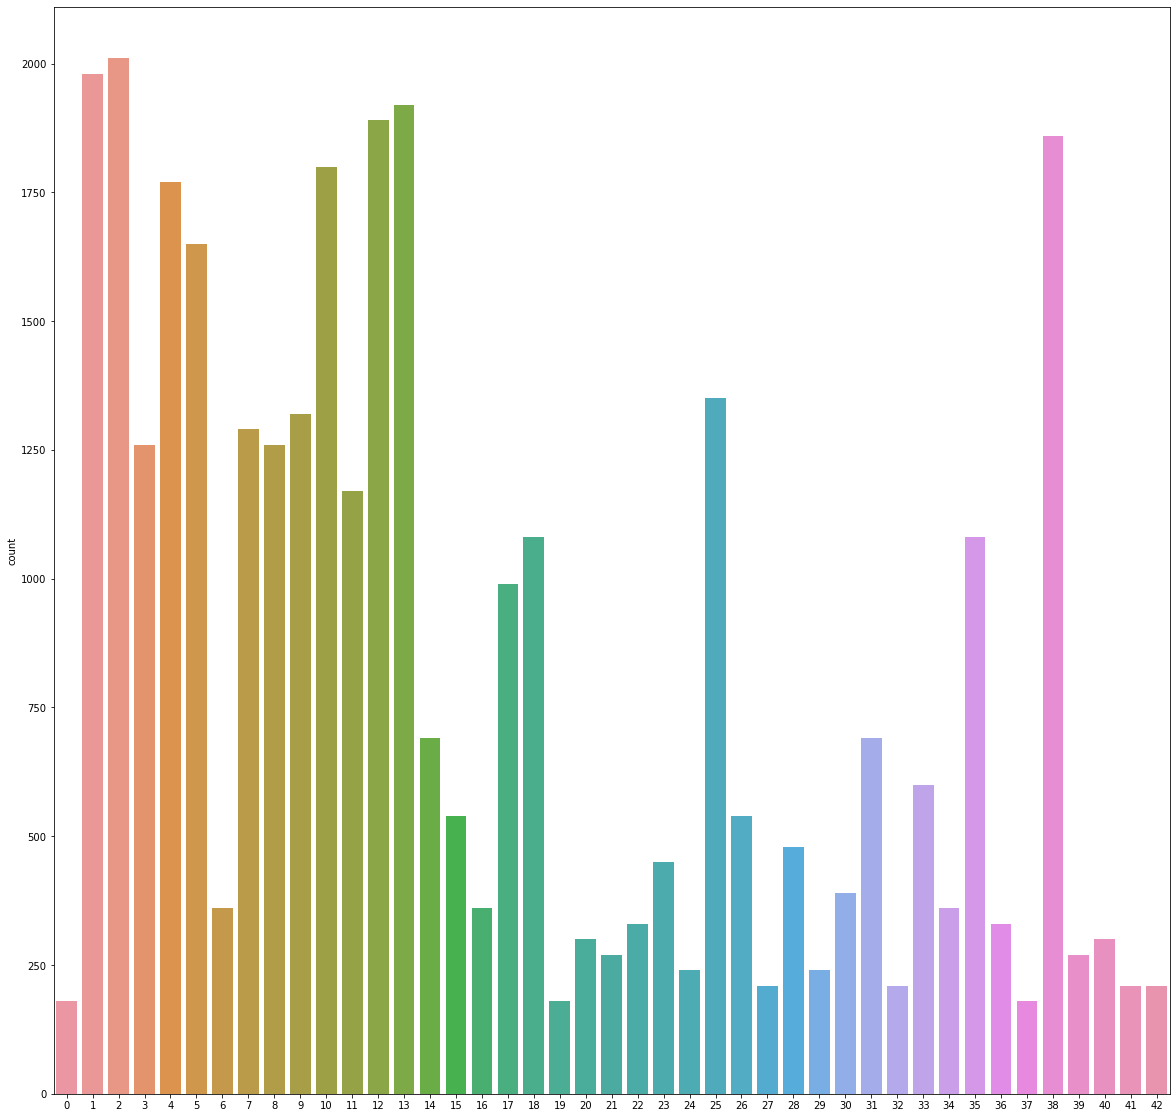

In [64]:
plt.figure(figsize=(20,20))
sns.countplot(y_train)

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Check Few sign

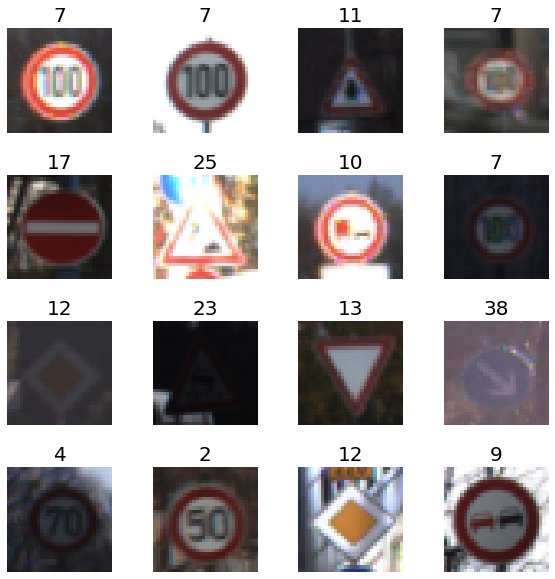

In [12]:
h_grid = 4
w_grid = 4

fig, axes = plt.subplots(h_grid, w_grid, figsize=(10,10))
axes = axes.ravel()

x_train_length = len(x_train)

for i in np.arange(0, w_grid * w_grid):
    number = np.random.randint(0, x_train_length)
    axes[i].imshow(x_train[number])
    axes[i].set_title(y_train[number], fontsize = 20)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Normalization

In [13]:
from sklearn.utils import shuffle

In [14]:
x_train, y_train = shuffle(x_train, y_train)

In [15]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_val_gray = np.sum(x_val/3, axis=3, keepdims=True)

In [16]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_val_gray_norm = (x_val_gray - 128)/128

In [17]:
x_train_gray_norm

array([[[[ 0.04166667],
         [ 0.03125   ],
         [ 0.078125  ],
         ...,
         [-0.09114583],
         [-0.18229167],
         [-0.16666667]],

        [[ 0.08072917],
         [ 0.109375  ],
         [ 0.13802083],
         ...,
         [ 0.01302083],
         [-0.10416667],
         [-0.1796875 ]],

        [[ 0.04947917],
         [ 0.04947917],
         [ 0.04166667],
         ...,
         [-0.0078125 ],
         [-0.0078125 ],
         [ 0.0234375 ]],

        ...,

        [[-0.57291667],
         [-0.46875   ],
         [-0.4140625 ],
         ...,
         [-0.671875  ],
         [-0.640625  ],
         [-0.58333333]],

        [[-0.46875   ],
         [-0.55729167],
         [-0.5859375 ],
         ...,
         [-0.64322917],
         [-0.60677083],
         [-0.54166667]],

        [[-0.1953125 ],
         [-0.35416667],
         [-0.4453125 ],
         ...,
         [-0.59635417],
         [-0.51302083],
         [-0.4296875 ]]],


       [[[-0.8359375 ],


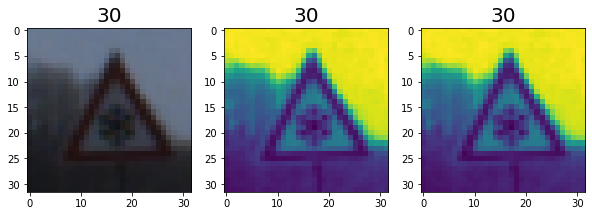

In [18]:
number = np.random.randint(0, x_train_length)

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
plt.sca(axes[0]); 
plt.imshow(x_train[number]); 
plt.title(y_train[number], fontsize = 20)
plt.sca(axes[1]); 
plt.imshow(x_train_gray[number]); 
plt.title(y_train[number], fontsize = 20)
plt.sca(axes[2]); 
plt.imshow(x_train_gray_norm[number]); 
plt.title(y_train[number], fontsize = 20)

plt.show()

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Building CNN

In [19]:
from tensorflow.keras import layers, models, datasets 

In [20]:
cnn_seq = models.Sequential()

cnn_seq.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
cnn_seq.add(layers.AveragePooling2D())

cnn_seq.add(layers.Dropout(0.2))

cnn_seq.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq.add(layers.AveragePooling2D())

cnn_seq.add(layers.Flatten())

cnn_seq.add(layers.Dense(120, activation='relu'))
cnn_seq.add(layers.Dense(84, activation='relu'))

cnn_seq.add(layers.Dense(43, activation='softmax'))

In [21]:
cnn_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0

In [22]:
cnn_seq.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
x_train_gray_norm.shape

(34799, 32, 32, 1)

In [24]:
history = cnn_seq.fit(x_train_gray_norm, y_train, batch_size=50, epochs=100, verbose=1, validation_data=(x_val_gray_norm, y_val))

Epoch 1/100
696/696 [==============================] - 11s 14ms/step - loss: 1.5724 - accuracy: 0.5612 - val_loss: 0.7630 - val_accuracy: 0.7771
Epoch 2/100
696/696 [==============================] - 9s 13ms/step - loss: 0.5217 - accuracy: 0.8454 - val_loss: 0.5169 - val_accuracy: 0.8476
Epoch 3/100
696/696 [==============================] - 9s 12ms/step - loss: 0.3384 - accuracy: 0.8990 - val_loss: 0.4254 - val_accuracy: 0.8753
Epoch 4/100
696/696 [==============================] - 8s 12ms/step - loss: 0.2414 - accuracy: 0.9280 - val_loss: 0.4307 - val_accuracy: 0.8803
Epoch 5/100
696/696 [==============================] - 8s 12ms/step - loss: 0.1925 - accuracy: 0.9435 - val_loss: 0.3747 - val_accuracy: 0.8946
Epoch 6/100
696/696 [==============================] - 9s 12ms/step - loss: 0.1547 - accuracy: 0.9526 - val_loss: 0.3736 - val_accuracy: 0.8902
Epoch 7/100
696/696 [==============================] - 9s 12ms/step - loss: 0.1265 - accuracy: 0.9622 - val_loss: 0.3582 - val_accuracy

696/696 [==============================] - 9s 13ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.4920 - val_accuracy: 0.9263
Epoch 58/100
696/696 [==============================] - 9s 13ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.4839 - val_accuracy: 0.9297
Epoch 59/100
696/696 [==============================] - 9s 13ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.4933 - val_accuracy: 0.9177
Epoch 60/100
696/696 [==============================] - 9s 13ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.4923 - val_accuracy: 0.9304
Epoch 61/100
696/696 [==============================] - 9s 14ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.3976 - val_accuracy: 0.9401
Epoch 62/100
696/696 [==============================] - 10s 15ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.4973 - val_accuracy: 0.9277
Epoch 63/100
696/696 [==============================] - 10s 15ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.4339 - val_accuracy: 0.9

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Test Model

In [25]:
cnn_seq.evaluate(x_test_gray_norm, y_test)

395/395 [==============================] - 2s 4ms/step - loss: 0.9043 - accuracy: 0.9220


[0.9043397307395935, 0.9220110774040222]

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:darkorange"> Model accuracy is 92% with loss of 0.9

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Wrapup

In [26]:
epochs = range(len(history.history['loss']))

In [27]:
epochs

range(0, 100)

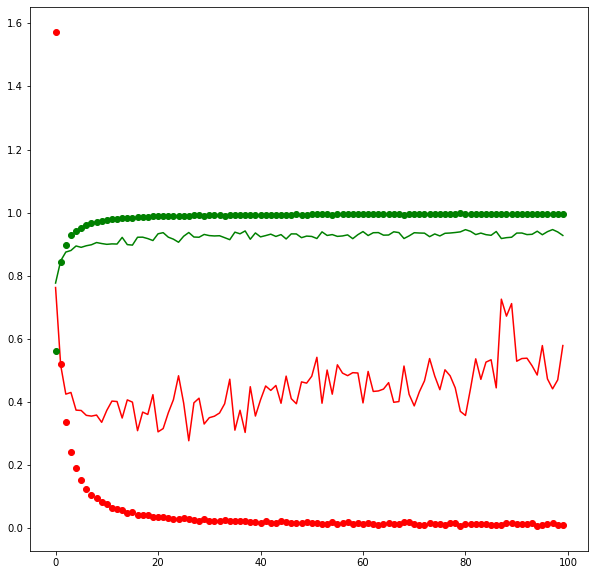

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(epochs, history.history['loss'], 'ro', label='Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Val loss')
plt.plot(epochs, history.history['accuracy'], 'go', label='Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='Val accuracy')

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Confusion Matrix

In [29]:
pred_class = np.argmax(cnn_seq.predict(x_test_gray_norm), axis=-1)

395/395 [==============================] - 2s 4ms/step


In [30]:
pred_class

array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

Text(249.0, 0.5, 'Predicted')

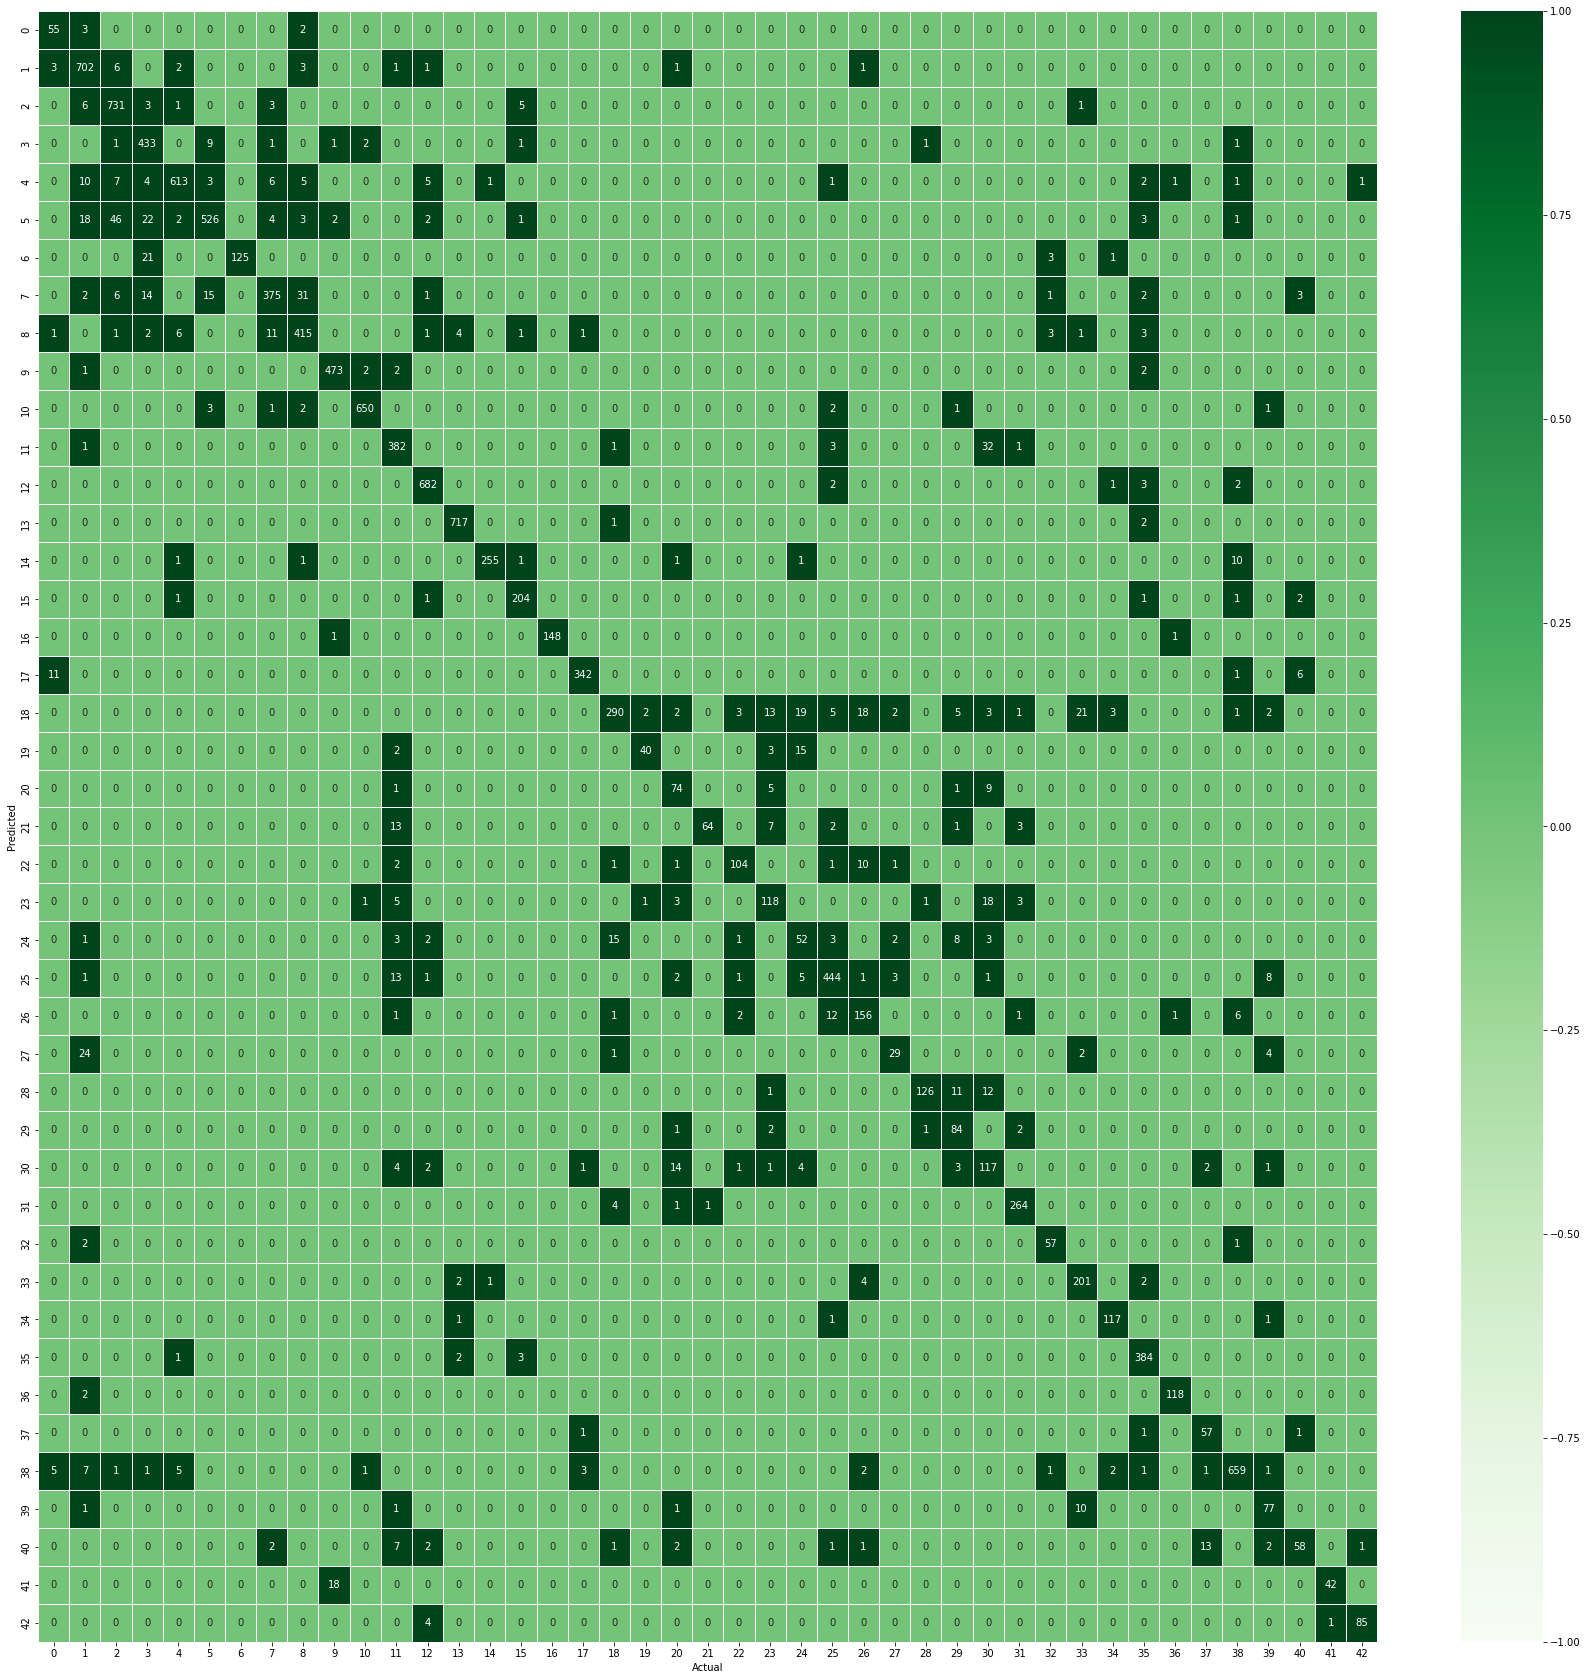

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_class)
plt.figure(figsize=(30,30))
sns.heatmap(cm, cmap='Greens', fmt='g', vmin=-1, vmax=1, annot=True, linewidth=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:darkorange"> Target class mapping

In [43]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

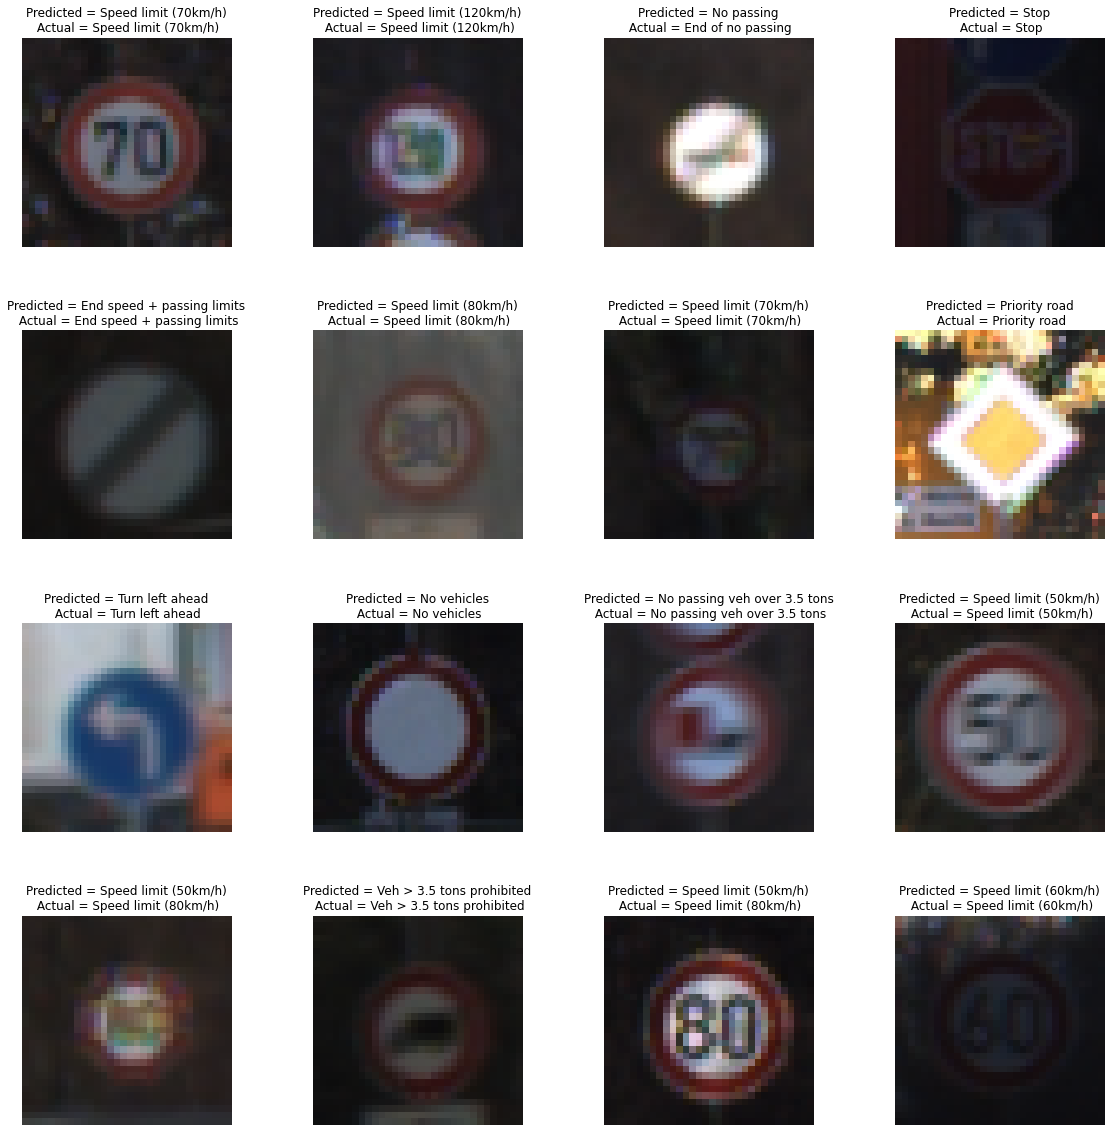

In [52]:
h_grid = 4
w_grid = 4

fig, axes = plt.subplots(h_grid, w_grid, figsize=(20,20))
axes = axes.ravel()

x_test_length = len(x_test)

for i in np.arange(0, w_grid * w_grid):
    number = np.random.randint(0, x_test_length)
    axes[i].imshow(x_test[number])
    axes[i].set_title('Predicted = {}\n Actual = {}'.format(classes.get(pred_class[number]), classes.get(y_test[number])))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        60
           1       0.90      0.97      0.94       720
           2       0.91      0.97      0.94       750
           3       0.87      0.96      0.91       450
           4       0.97      0.93      0.95       660
           5       0.95      0.83      0.89       630
           6       1.00      0.83      0.91       150
           7       0.93      0.83      0.88       450
           8       0.90      0.92      0.91       450
           9       0.96      0.99      0.97       480
          10       0.99      0.98      0.99       660
          11       0.87      0.91      0.89       420
          12       0.97      0.99      0.98       690
          13       0.99      1.00      0.99       720
          14       0.99      0.94      0.97       270
          15       0.94      0.97      0.96       210
          16       1.00      0.99      0.99       150
          17       0.98    

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:black"> Model is giving low precision and low recall for class - 24, we should look at it

In [59]:
model_json = cnn_seq.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
cnn_seq.save_weights("model.h5")
print("Saved CNN model to disk")

Saved CNN model to disk
